In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import norm

In [35]:
rc('text', usetex=True)

In [38]:
df10 = pd.read_excel("lab114.2.xlsx")
df40 = pd.read_excel("40sec.xlsx")
df40

,Число импульсов,Доля случаев
0,34,0.001
1,35,0.000
2,36,0.000
3,37,0.000
4,38,0.001
5,39,0.000
6,40,0.001
7,41,0.001
8,42,0.000
9,43,0.002


In [55]:
x_40 = np.array(df40[df40.columns[0]])
y_40 = np.array(df40[df40.columns[1]])

x_10 = np.array(df10[df10.columns[0]])
y_10 = np.array(df10[df10.columns[1]])

In [56]:
N = 1000
data_40 = []
for (x, y) in zip(x_40, y_40):
    for i in range(int(y*N)):
        if i%4==0: data_40.append(x)
data_40 = np.array(data_40)

In [57]:
N = 1000
data_10 = []
for (x, y) in zip(x_10, y_10):
    for i in range(int(y*N)):
        data_10.append(x)
data_10 = np.array(data_10)

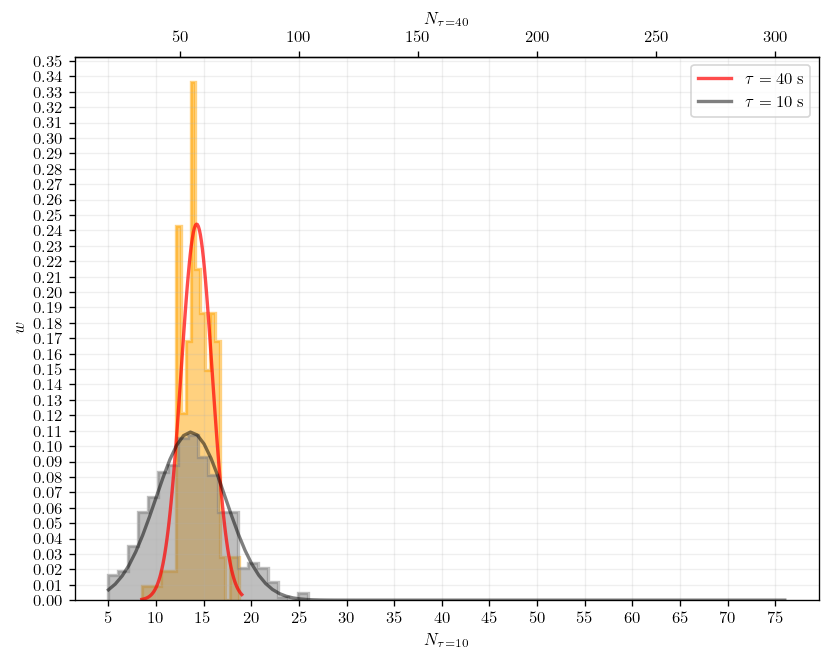

In [58]:
# Plot Line1 (Left Y Axis)
fig, ax = plt.subplots(1,1,figsize=(8,6), dpi=120)


ax.hist(data_40/4 , bins=20, 
         density=True, fill=False, 
         linewidth=2, histtype='step',
        color="orange", alpha=.5)
ax.hist(data_40/4, bins=20, 
         density=True, fill=True, 
        color="orange", alpha=.5)

ax.hist(data_10, bins=20, 
         density=True, fill=False, 
         linewidth=2, histtype='step',
        color="gray", alpha=0.5)
ax.hist(data_10, bins=20, 
         density=True, fill=True, 
        color="gray", alpha=0.5)


x_nd_40 = np.linspace(min(x_40/4), max(x_40/4), 100)
mu_40, std_40 = norm.fit(data_40/4)
p_40 = norm.pdf(x_nd_40, mu_40, std_40)
ax.plot(x_nd_40, p_40, color="red", alpha=0.7, linewidth=2, label="$\\tau=40 \; \\mathrm{s}$")

x_nd_10 = np.linspace(min(x_10), max(x_10), 100)
mu_10, std_10 = norm.fit(data_10)
p_10_nd = norm.pdf(x_nd_10, mu_10, std_10)
ax.plot(x_nd_10, p_10_nd, color="black", alpha=0.5, linewidth=2, label="$\\tau=10 \; \\mathrm{s}$")


def forward(x):
    return x * 4

def inverse(x):
    return x / 4

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('$N_{\\tau=40}$')

plt.xlabel('$N_{\\tau=10}$')
plt.ylabel('$w$')
plt.grid(alpha=0.2)
plt.legend()

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))

plt.savefig("liz_his")
plt.show()